In [2]:
import concurrent
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path = "/home/vasily/Projects/empirica_traveling_flame/chemistry/mechanisms/merino_66_mech/Skeletal_66-SD_20161214.yaml"

In [4]:
gas = ct.Solution(path)

/tmp/ipykernel_602077/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(path)
/tmp/ipykernel_602077/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(path)
/tmp/ipykernel_602077/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(path)
/tmp/ipykernel_602077/1838067439.py:1: UserWarning: NasaPoly2::validate: 
For species 

In [5]:

Y_air_N2= 0.767
Y_air_O2= 0.233


In [6]:
def sim_flame(gas, T, P, Y_fuel):
    gas.TPY = T, P,  {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
    f=ct.FreeFlame(gas,width=0.4)
    # f.set_max_time_step(1000)
    f.set_refine_criteria(ratio=3,slope=0.06,curve=0.12)
    # f.transport_model='Multi'
    f.solve(0,auto=True,refine_grid=True)
    return f

In [6]:
def job(T, Y):
    gas = ct.Solution(path)
    f = sim_flame(gas, T, 1e5, Y)
    return T, Y, np.array(f.grid), np.array(f.velocity), np.array(f.T), np.array(f.Y)

In [7]:
Ys = np.linspace(0.04, 0.085, 8)
# T = 300
Ts = [300, 293, 310, 330]

In [7]:
# ress = [[] for _ in range(4)]

In [8]:
# for i in range(0, len(Ts)):
#     print(i)
#     for j in range(0, len(Ys)):
#         print(j)
#         ress[i].append(sim_flame(gas, Ts[i], 1e5, Ys[j]))

In [9]:
# ress

In [10]:
import pickle

In [11]:
def save():
    rn = [[(np.array(f.grid), np.array(f.velocity), np.array(f.T), np.array(f.Y)) for f in i] for i in ress]

    obj = np.array(Ts), np.array(Ys), rn
    pickle.dump(obj, open("flame_speed_plots_calc.pickle", "wb"))

In [12]:
# save()

In [13]:
rn = None
Ts = None
Ys = None

In [14]:
def load():
    global Ts, Ys, rn
    Ts, Ys, rn = pickle.load( open("flame_speed_plots_calc.pickle", "rb"))

In [15]:
load()

Text(0, 0.5, '$S_L$, см/c')

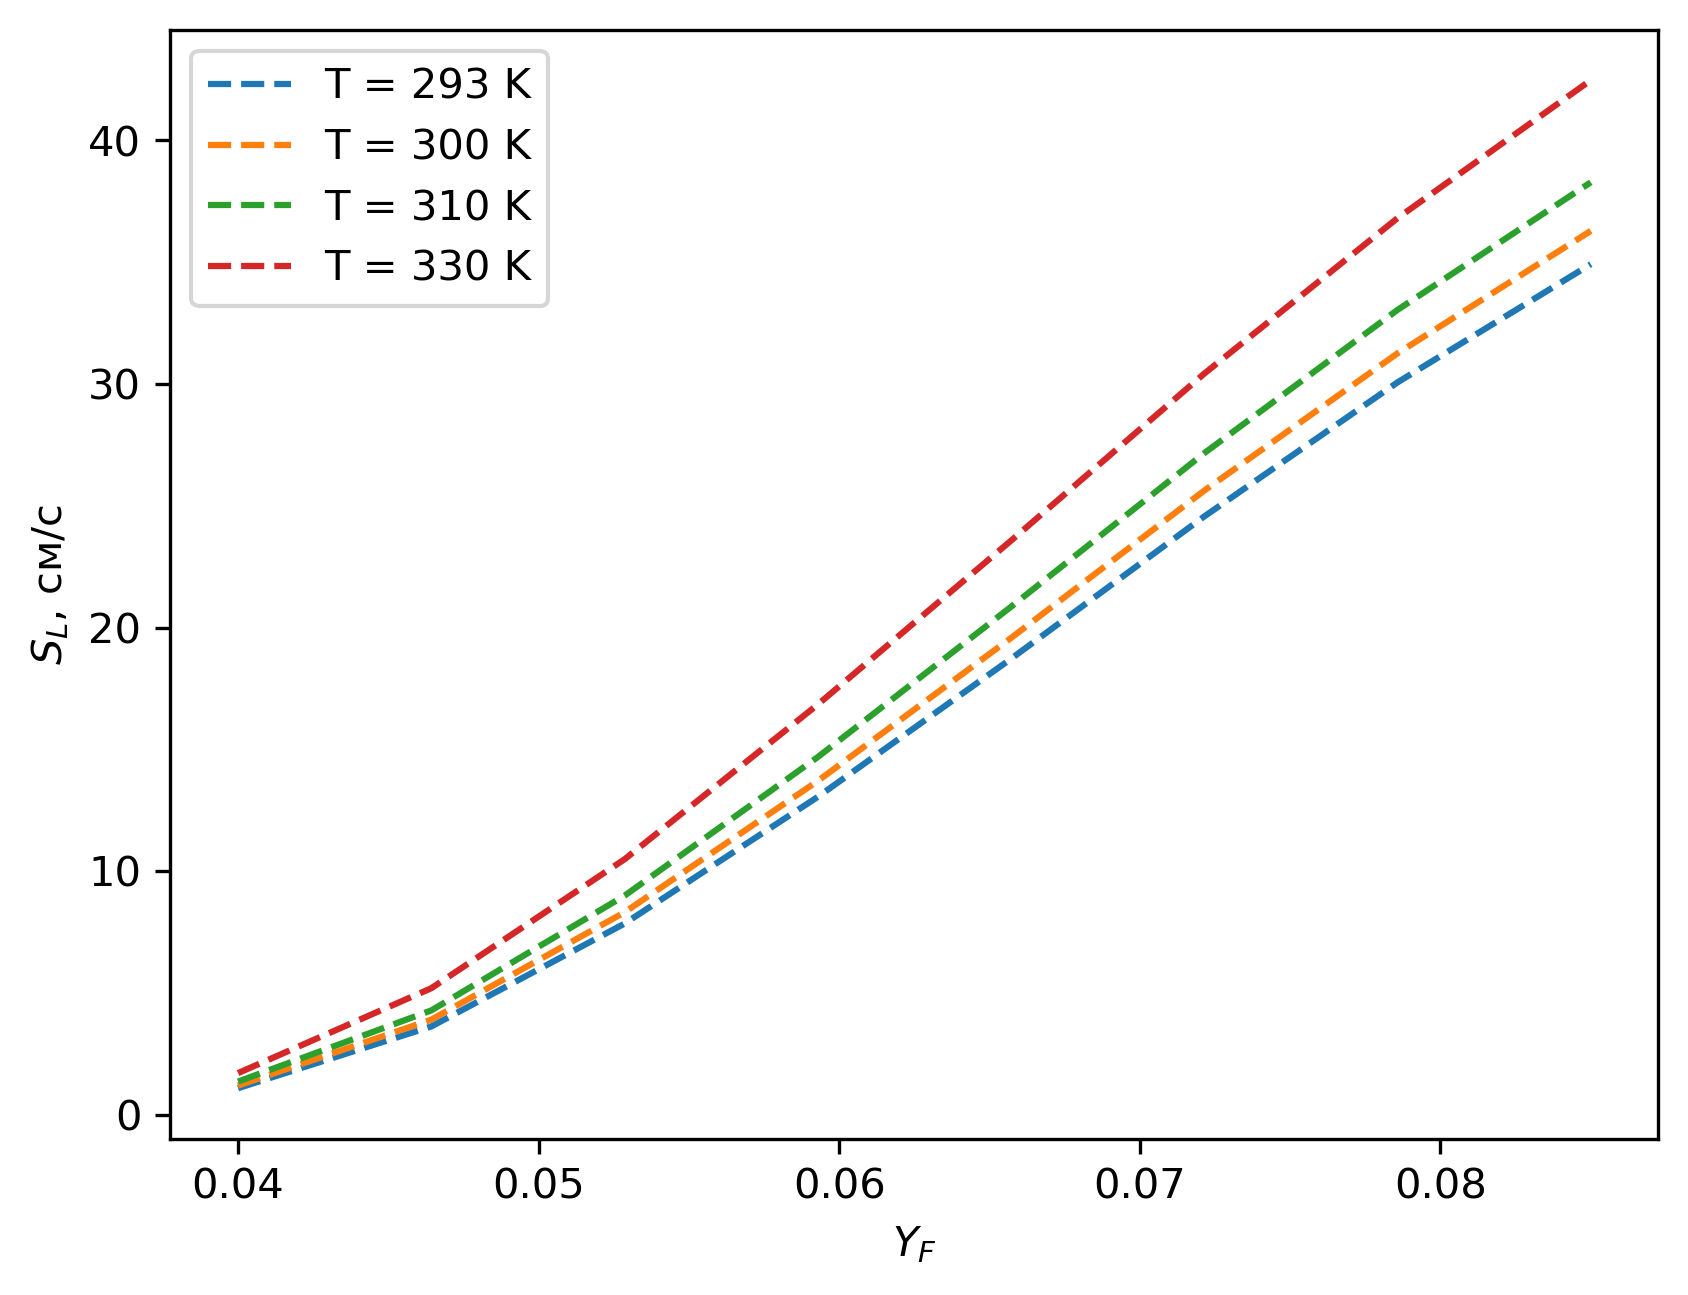

In [16]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

for i in range(len(Ts)):
    plt.plot(Ys, [f[1][0]*100 for f in rn[i]], "--", label=f"T = {Ts[i]:.0f} K")
plt.legend()
plt.xlabel("$Y_F$")
plt.ylabel("$S_L$, см/c")


In [20]:
rn[0][0][-1][:, -1]

array([7.36300114e-01, 1.62212347e-31, 6.20024639e-40, 1.57350576e-12,
       1.40017362e-01, 3.20550963e-06, 1.43641718e-08, 5.49380461e-10,
       4.72208634e-02, 1.66684491e-08, 8.01395143e-09, 7.64584139e-02,
       8.44294546e-43, 5.30263624e-41, 5.07636353e-39, 8.10771167e-39,
       1.30297724e-19, 6.74814181e-46, 3.56099942e-38, 1.60713850e-47,
       3.97198255e-47, 2.23697064e-46, 1.11565134e-09, 1.97244822e-12,
       2.34948568e-42, 4.61598416e-43, 1.17741719e-38, 7.63812302e-43,
       2.65593735e-44, 5.46385867e-50, 2.83567410e-44, 4.46302657e-44,
       2.36537678e-49, 1.29880250e-49])

In [34]:
# products = np.array([ 0.6905784 ,  0.        ,  0.        ,  0.        ,  0.        ,
#         0.        ,  0.        ,  0.        ,  0.11820377,  0.        ,
#         0.        ,  0.19121783, -0.        , -0.        ,  0.        ,
#         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
#         0.        ,  0.        ,  0.        ,  0.        ])
# o2_mult = np.array([1 if i in ["O2"] else 0 for i in gas.species_names])
# n2_mult = np.array([1 if i in ["N2"] else 0 for i in gas.species_names])
# fuel = np.array([1 if i in ["C2H5OH"] else 0 for i in gas.species_names])
# air = o2_mult*Y_air_O2 + n2_mult*Y_air_N2



In [35]:
Y_end_s = np.array([f[-1][:, -1] for f in rn[1]])
Y_st_s = np.array([f[-1][:, 0] for f in rn[1]])

o2_mult = np.array([1 if i in ["O2"] else 0 for i in gas.species_names])
n2_mult = np.array([1 if i in ["N2"] else 0 for i in gas.species_names])
# air_mult = o2_mult + n2_mult
fuel_mult= np.array([1 if i in ["C2H5OH"] else 0 for i in gas.species_names])
Y_air_end = Y_end_s* o2_mult + (n2_mult * Y_air_N2/Y_air_O2) * np.sum(Y_end_s* o2_mult, axis=1).reshape(-1, 1)
Y_fuel_end = Y_end_s*fuel_mult
Y_prd_end = Y_end_s - Y_air_end - Y_fuel_end
air = np.sum(Y_air_end, axis=1)
ft = np.sum(Y_st_s * fuel_mult, axis=1)
fu = np.sum(Y_fuel_end, axis=1)
airFuelMassRation = np.mean((1 - ft - air)/(ft - fu))
airFuelMassRation
Y_products = Y_prd_end/np.sum(Y_prd_end, axis=1).reshape(-1, 1)
Y_products_mean = np.mean(Y_products, axis=0)
Y_products_mean/=np.sum(Y_products_mean)
Y_products_mean[Y_products_mean< 0.001] = 0

In [91]:
Y_products_mean

array([0.68998954, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11805472, 0.        ,
       0.        , 0.19098148, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

array([0.6973712 , 0.        , 0.        , 0.        , 0.11911233,
       0.        , 0.        , 0.        , 0.05238972, 0.        ,
       0.        , 0.0846828 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04642857, 0.        , 0.        , 0.        ])

In [106]:
I = -1
# Y_test = Y_end_s[I]
# Y_test[Y_test < 0.001] = 0
# Y_test /= np.sum(Y_test)

gas.TPY = 300, 1e5, Y_st_s[I]
phi_before = gas.equivalence_ratio(fuel="C2H5OH:1", oxidizer="O2:233,N2:767", basis='mass')
Y_for_test = ( Y_products_mean*0.01 + (o2_mult*Y_air_O2+n2_mult*Y_air_N2)*0.99) * (1-Ys[I]) + fuel_mult*Ys[I]
gas.TPY = 300, 1e5, Y_for_test
phi_after = gas.equivalence_ratio(fuel="C2H5OH:1", oxidizer="O2:233,N2:767", basis='mass')
phi_after, phi_before

(0.8406014199429642, 0.8307631303405841)

In [107]:
gas.TPY = 300, 1e5, Y_for_test
f=ct.FreeFlame(gas,width=0.4)
# f.set_max_time_step(1000)
f.set_refine_criteria(ratio=3,slope=0.06,curve=0.12)
# f.transport_model='Multi'
f.solve(0,auto=True,refine_grid=True)

In [108]:
f.velocity[0]

np.float64(0.35694716167595053)

In [105]:
rn[1][I][1][0]

np.float64(0.3628641633657252)

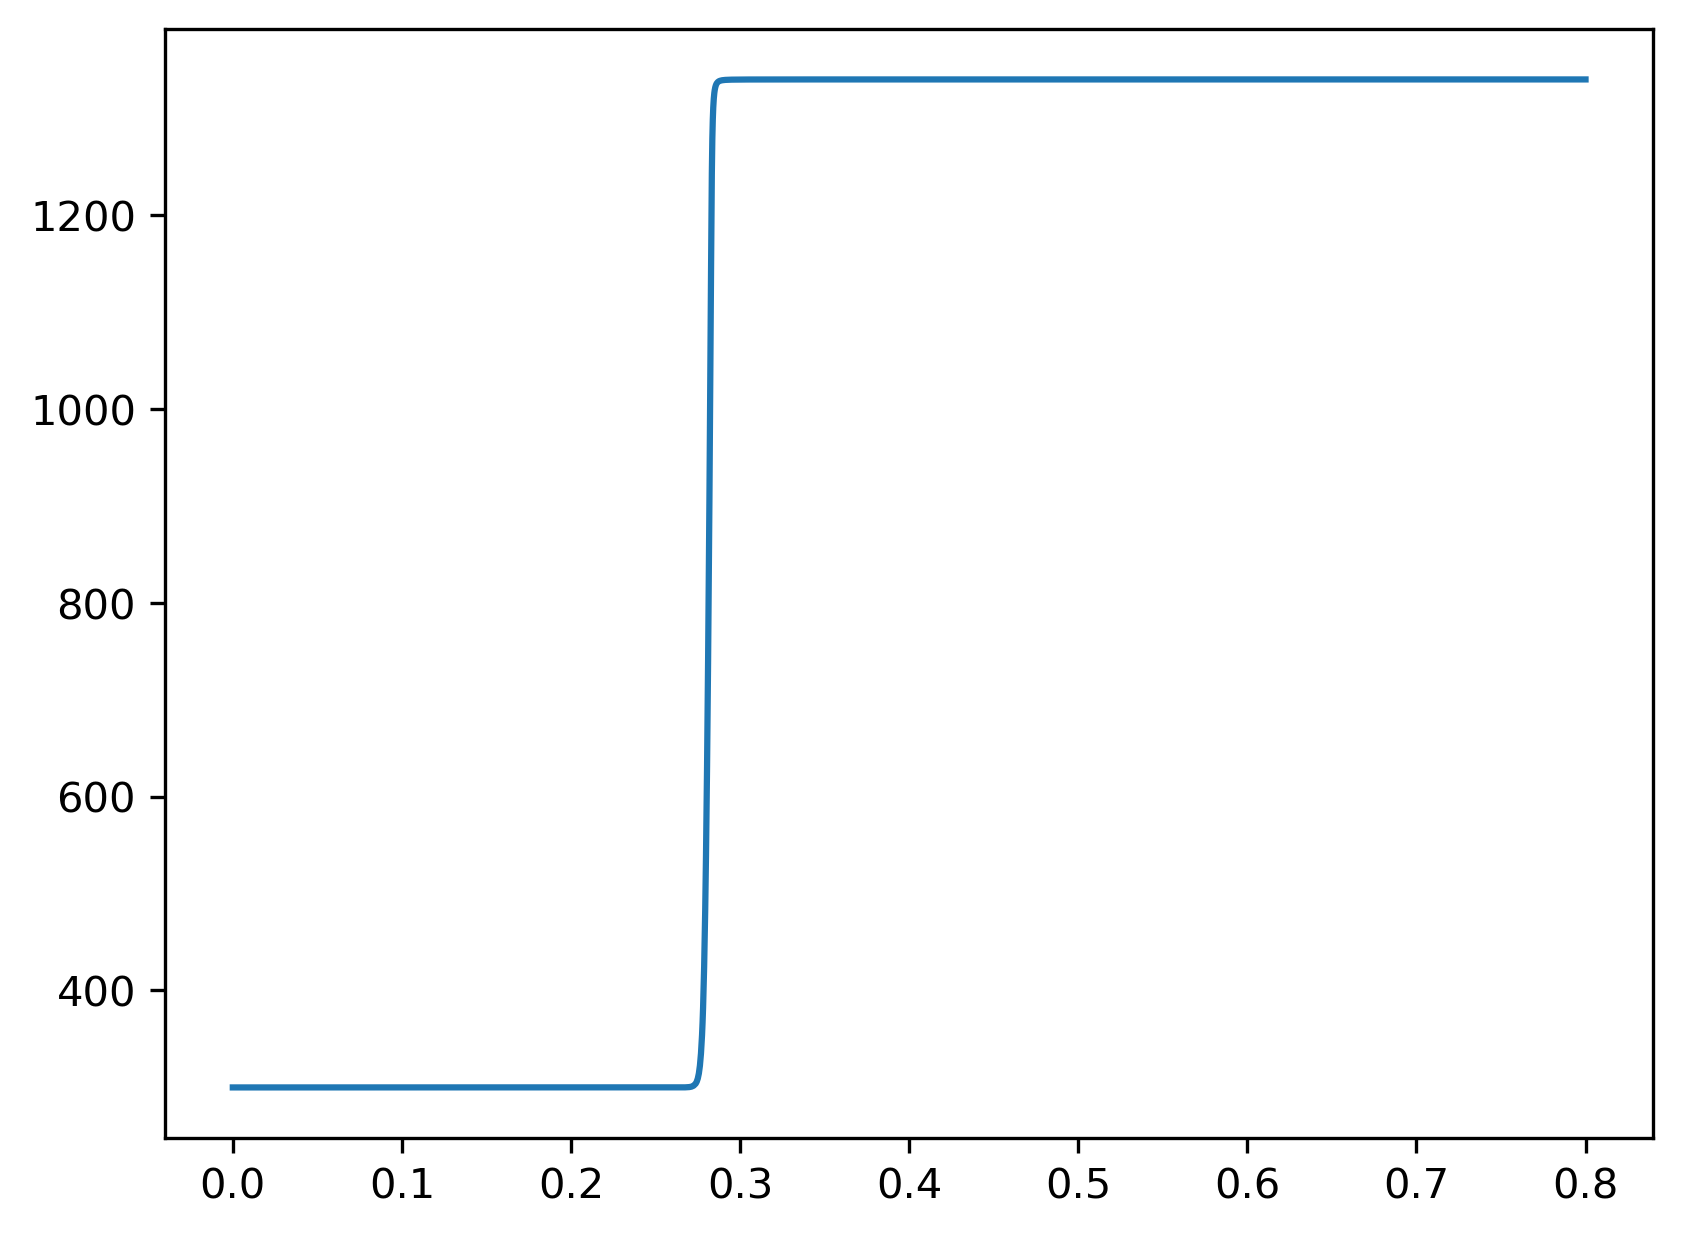

In [88]:
plt.plot(f.grid, f.T)